In [1]:
import os, glob, random
import albumentations as A

from utils.data import get_datasize
from albumentations.pytorch import transforms

In [2]:
root_dir = './segmentation/dataset/refined/'

In [3]:
for i in ['crushed', 'scratched', 'separated']:
    for j in ['train', 'val', 'test']:
        print(f'{i.capitalize()}_{j} | ', end='')
        get_datasize(root_dir=root_dir, damage=i, type=j)
    print('')

Crushed_train | Image file size : 1000 | Mask file size : 1000
Crushed_val | Image file size : 100 | Mask file size : 100
Crushed_test | Image file size : 100 | Mask file size : 100

Scratched_train | Image file size : 1400 | Mask file size : 1400
Scratched_val | Image file size : 200 | Mask file size : 200
Scratched_test | Image file size : 200 | Mask file size : 200

Separated_train | Image file size : 1100 | Mask file size : 1100
Separated_val | Image file size : 100 | Mask file size : 100
Separated_test | Image file size : 63 | Mask file size : 63



In [4]:
from utils.visual import *

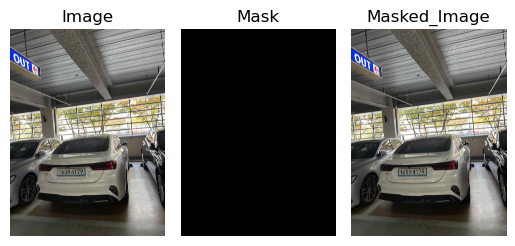

In [5]:
img_path = glob.glob('./segmentation/dataset/refined/crushed/train/image/*')
random_img = random.sample(img_path, k=1)
name = random_img[0].split('/')[-1].split('.')[0]
mask_path = glob.glob(f'./segmentation/dataset/refined/crushed/train/label/{name}*')[0]
visual_img(img_path=random_img[0], mask_path=mask_path)

In [5]:
from segmentation.data_loader import *

In [6]:
transform_train = A.Compose([
    A.HorizontalFlip(),
    A.Rotate((-30, 30), p=0.5, border_mode=cv2.BORDER_REFLECT,),
    A.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3),
    A.Resize(256, 256),
    A.Normalize(mean = 0.5, std=0.5),
    transforms.ToTensorV2(transpose_mask=True)
])

train_dataset = Custom_dataset('./segmentation/dataset/refined/scratched/train/', transform=transform_train)

In [7]:
transform_val = A.Compose([
    A.Resize(256, 256),
    A.Normalize(mean = 0.5, std=0.5),
    transforms.ToTensorV2(transpose_mask=True)
])

In [8]:
val_dataset = Custom_dataset(data_dir='./segmentation/dataset/refined/scratched/val/', transform=transform_val)

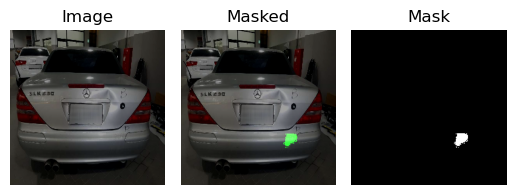

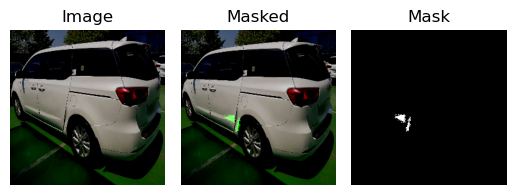

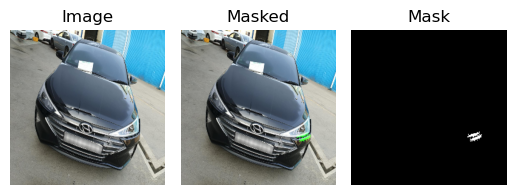

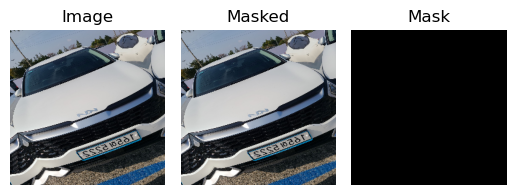

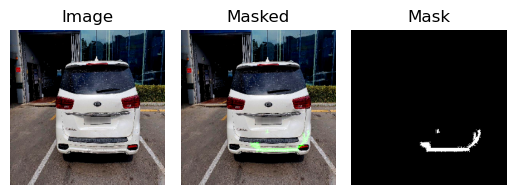

In [9]:
for i in random.sample(range(len(train_dataset)), k=5):
    visual_dataset(train_dataset[i])

In [10]:
train_dir = './segmentation/dataset/refined/scratched/train/'
train_dataloader = get_dataloader(data_dir_=train_dir, transform_=transform_train, batch_size=4)

In [11]:
val_dir = './segmentation/dataset/refined/scratched/val/'
val_dataloader = get_dataloader(data_dir_=val_dir, transform_=transform_train, batch_size=4)

In [12]:
len(train_dataloader), len(val_dataloader)

(350, 50)